# Autism Prediction 

# Import Libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,cross_val_score ,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder ,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

# Load Data and Understand

In [113]:
df_autism = pd.read_csv(r"data\train.csv") # Read the data

In [114]:
df_autism.shape # Check the shape of the data

(800, 22)

In [115]:
df_autism.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [116]:
df_autism.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [117]:
df_autism.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [118]:
df_autism.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [119]:
pd.set_option('display.max_columns', None)

In [120]:
df_autism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [121]:
#convert age column to integer
df_autism['age'] = df_autism['age'].astype(int)

In [122]:
# find missing values and replace ? with NaN
df_autism.replace('?', np.nan, inplace=True)
df_autism.isnull().sum()

ID                   0
A1_Score             0
A2_Score             0
A3_Score             0
A4_Score             0
A5_Score             0
A6_Score             0
A7_Score             0
A8_Score             0
A9_Score             0
A10_Score            0
age                  0
gender               0
ethnicity          203
jaundice             0
austim               0
contry_of_res        0
used_app_before      0
result               0
age_desc             0
relation            40
Class/ASD            0
dtype: int64

In [123]:
df_autism.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,NaN,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,NaN,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,NaN,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,NaN,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [124]:
#find unique values in each column exceept ID , age and result
for col in df_autism.columns:
    if col not in ['ID', 'age', 'result']:
        print(f"{col}: {df_autism[col].unique()}")

A1_Score: [1 0]
A2_Score: [0 1]
A3_Score: [1 0]
A4_Score: [0 1]
A5_Score: [1 0]
A6_Score: [0 1]
A7_Score: [1 0]
A8_Score: [0 1]
A9_Score: [1 0]
A10_Score: [1 0]
gender: ['f' 'm']
ethnicity: [nan 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice: ['no' 'yes']
austim: ['no' 'yes']
contry_of_res: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh

In [125]:
#drop id and ages_desc columns
df_autism.drop(columns=['ID', 'age_desc'], inplace=True)

In [126]:
df_autism.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

### Mapping

In [127]:
# Relac Viet Nam with Vietnam
df_autism['contry_of_res'] = df_autism['contry_of_res'].replace('Viet Nam', 'Vietnam')
df_autism['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [128]:
#Replace Hong Kong with China
df_autism['contry_of_res'] = df_autism['contry_of_res'].replace('Hong Kong', 'China')
df_autism['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China',
       'Angola', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [129]:
df_autism['contry_of_res'] = df_autism['contry_of_res'].replace('AmericanSamoa', 'United States')

In [130]:
df_autism['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [131]:
#target column distribution
df_autism['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [132]:
df_autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,NaN,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,NaN,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,NaN,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,NaN,no,no,South Africa,no,-4.777286,Self,0


In [133]:
df_autism['ethnicity'].value_counts()

ethnicity
White-European     257
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [134]:
df_autism['ethnicity'] = df_autism['ethnicity'].replace('others', 'Others')

In [135]:
df_autism['ethnicity'].value_counts()

ethnicity
White-European     257
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

In [136]:
df_autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,NaN,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,NaN,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,NaN,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,NaN,no,no,South Africa,no,-4.777286,Self,0


In [137]:
df_autism.shape

(800, 20)

# Explratory Data Analysis (EDA)

In [138]:
df_autism.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


In [139]:
df_autism.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,NaN,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,NaN,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,NaN,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,NaN,no,no,South Africa,no,-4.777286,Self,0
5,1,0,0,0,0,1,0,0,1,1,31,m,Middle Eastern,no,no,Jordan,no,9.562117,Self,0
6,1,0,0,0,0,0,1,1,1,0,28,f,Pasifika,no,no,United Kingdom,no,7.984569,Self,0
7,1,1,1,1,1,1,1,0,1,1,26,m,Black,no,yes,United States,no,13.237898,Self,1
8,1,1,1,1,0,0,0,1,1,1,48,m,White-European,no,no,Brazil,no,-1.755774,Self,0
9,0,0,0,0,0,0,0,1,0,1,24,f,Others,yes,no,New Zealand,no,14.922570,Self,0


## Univaritate Analysis

In [140]:
# Set the desired theme
sns.set_theme(style="whitegrid")

Mean Age: 27.96375
Median Age: 24.0


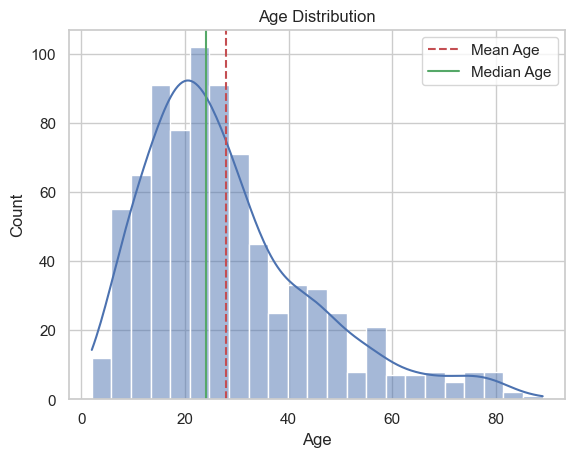

In [141]:
# histrogram for age column
sns.histplot(df_autism['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
age_mean = df_autism['age'].mean()
age_median = df_autism['age'].median()
print(f"Mean Age: {age_mean}")
print(f"Median Age: {age_median}")

#add vertical lines for mean and median on above plot
plt.axvline(age_mean, color='r', linestyle='--', label='Mean Age')
plt.axvline(age_median, color='g', linestyle='-', label='Median Age')
plt.legend()
plt.show()

Mean Result: 8.537303106501248
Median Result: 9.605299308


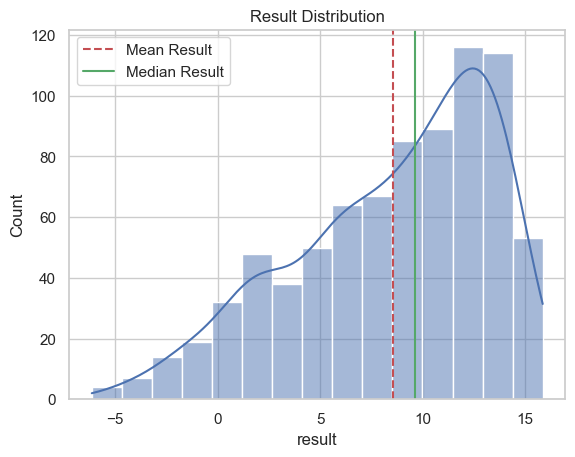

In [142]:
#histogram for result column
sns.histplot(df_autism['result'], kde=True)
plt.title('Result Distribution')
plt.xlabel('result')
result_mean = df_autism['result'].mean()
result_median = df_autism['result'].median()
print(f"Mean Result: {result_mean}")
print(f"Median Result: {result_median}")

#add vertical lines for mean and median on above plot
plt.axvline(result_mean, color='r', linestyle='--', label='Mean Result')
plt.axvline(result_median, color='g', linestyle='-', label='Median Result')
plt.legend()
plt.show()

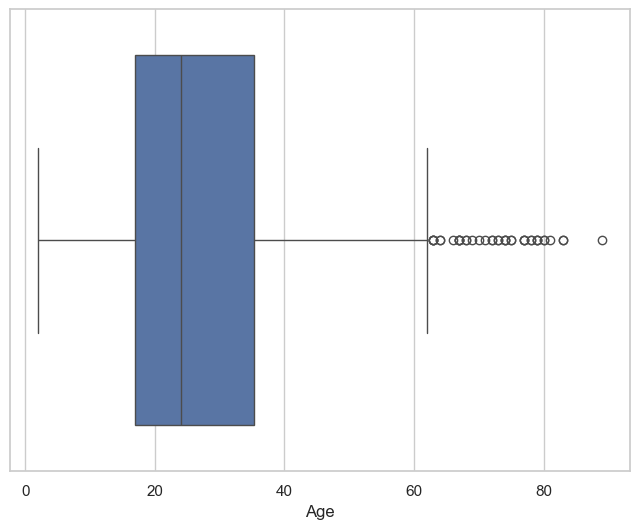

In [143]:
# Identifies outliers in the age column using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_autism['age'])
plt.xlabel('Age')
plt.show()

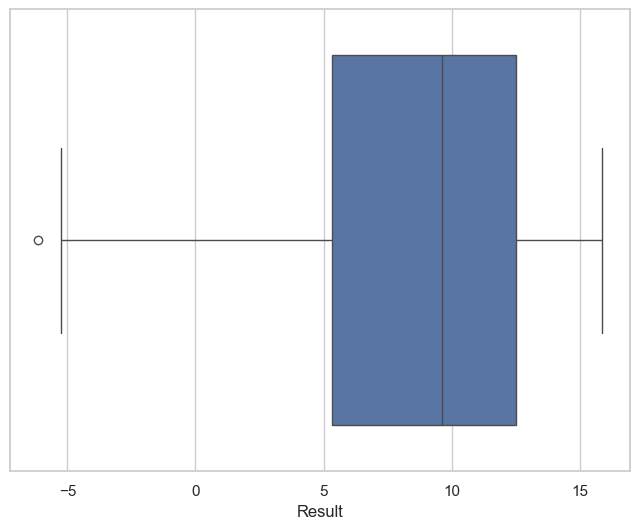

In [144]:
# Identifies outliers in the result column using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_autism['result'])
plt.xlabel('Result')
plt.show()

In [145]:
# Count the outlier using IQR method
Q1 = df_autism['age'].quantile(0.25)
Q3 = df_autism['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df_autism[(df_autism['age'] < lower_bound) | (df_autism['age'] > upper_bound)]


In [146]:
len(age_outliers)

39

In [147]:
# Count the outlier of result using IQR method
Q1_result = df_autism['result'].quantile(0.25)
Q3_result = df_autism['result'].quantile(0.75)
IQR_result = Q3_result - Q1_result
lower_bound_result = Q1_result - 1.5 * IQR_result
upper_bound_result = Q3_result + 1.5 * IQR_result
result_outliers = df_autism[(df_autism['result'] < lower_bound_result) | (df_autism['result'] > upper_bound_result)]
len(result_outliers)

1

## Univaritave analysis of Categorical column

In [148]:
df_autism.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [149]:
# select categorical columns
categotrical_columns = df_autism.select_dtypes(include=['object']).columns
categotrical_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

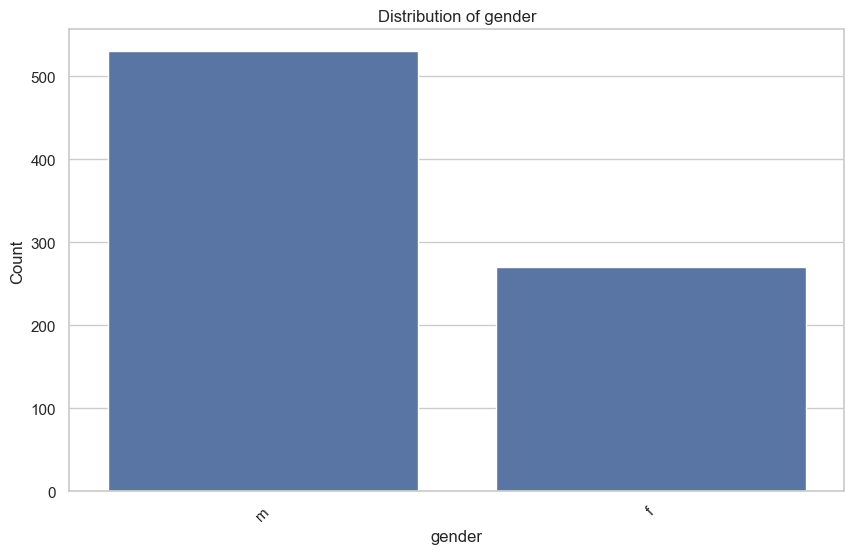

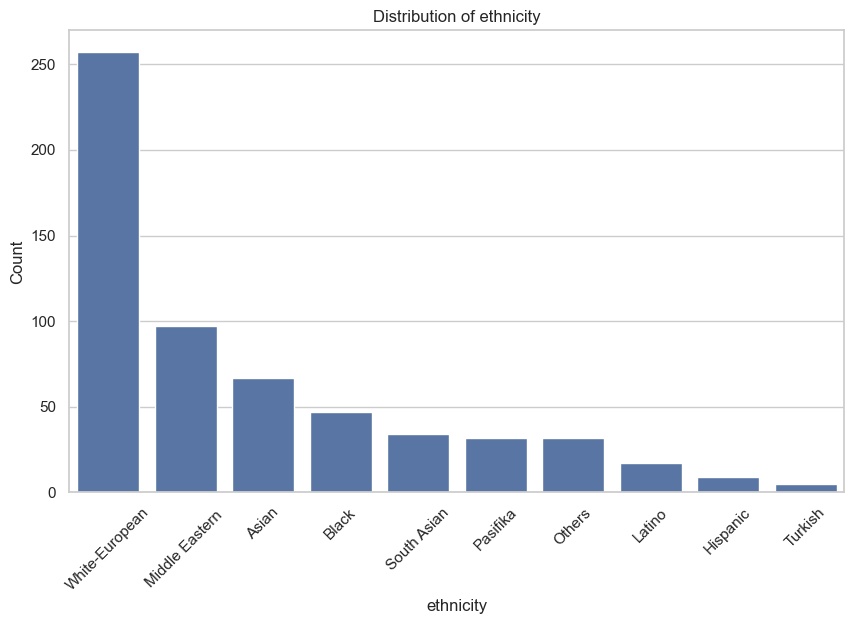

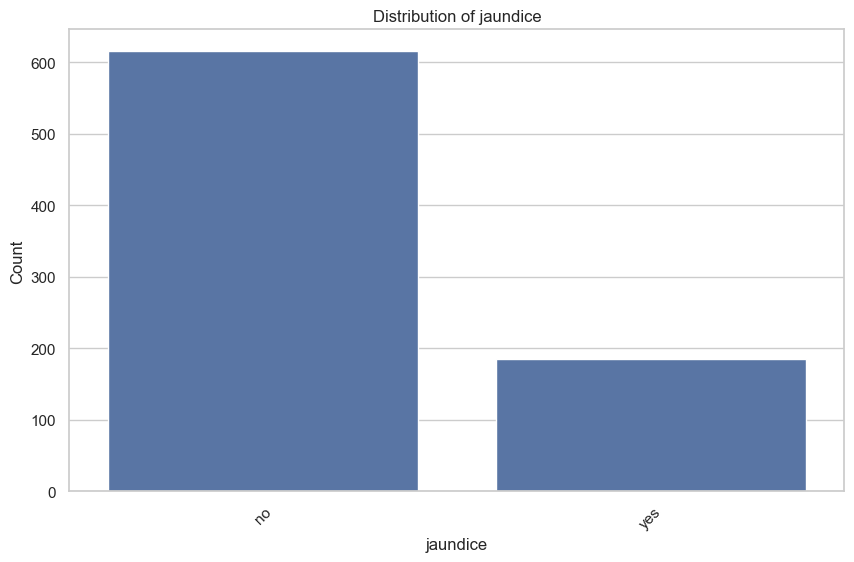

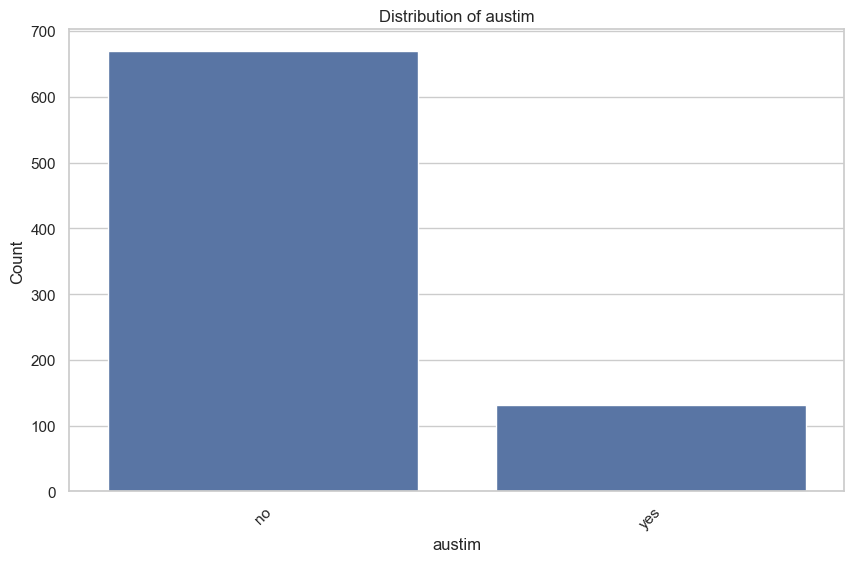

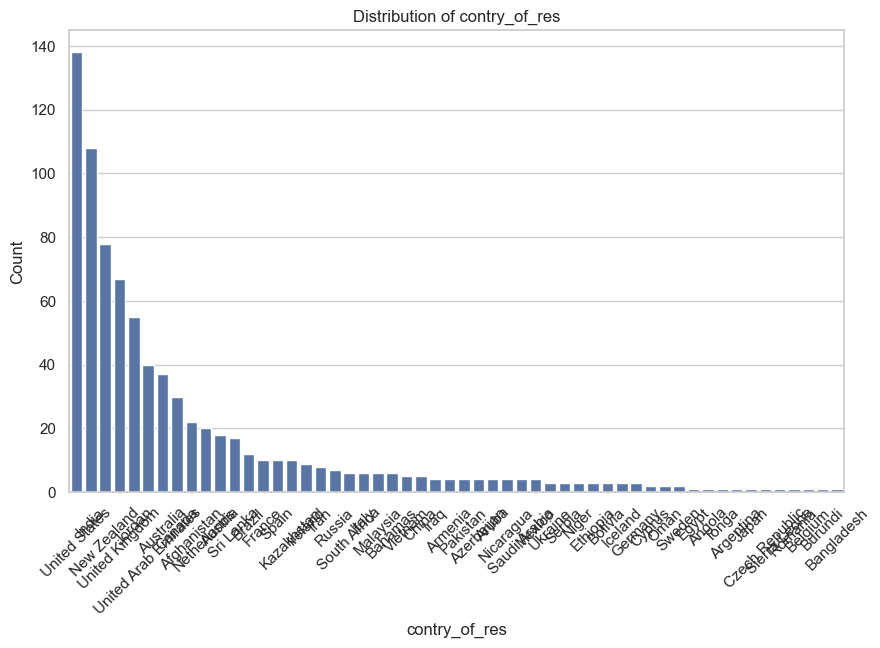

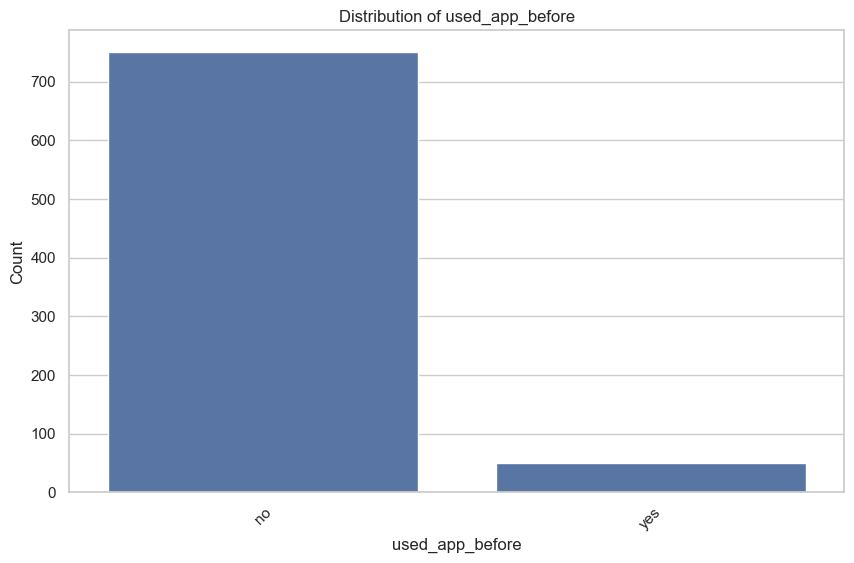

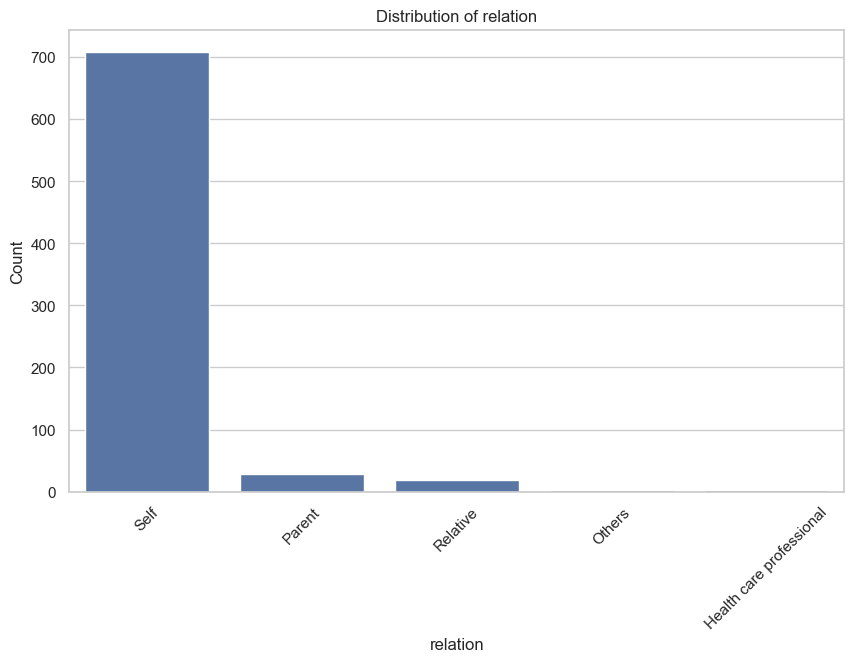

In [150]:
# data distribution of categorical columns
for col in categotrical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_autism, x=col, order=df_autism[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

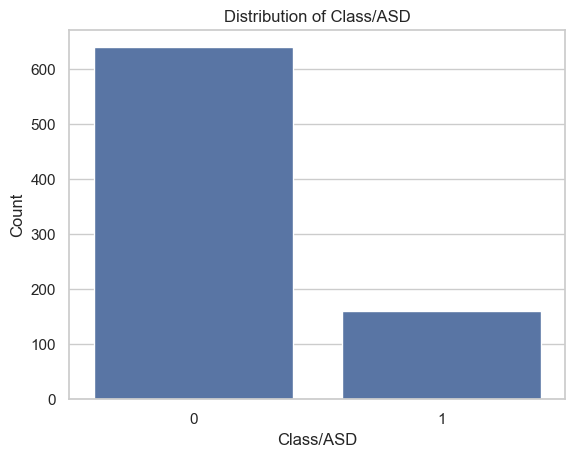

In [151]:
# countplot of target column (Class/ASD)
sns.countplot(data=df_autism, x='Class/ASD', order=df_autism['Class/ASD'].value_counts().index)
plt.title('Distribution of Class/ASD')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

# Handle Missing values

In [152]:
# check unique values in ethenicity column
df_autism['ethnicity'].unique()

array([nan, 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [155]:
df_autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


In [154]:
# replace NaN in ethenicity column with Others
df_autism['ethnicity'] = df_autism['ethnicity'].fillna('Others')
df_autism['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [156]:
df_autism['relation'] = df_autism['relation'].fillna('Others')
df_autism['relation'].unique()

array(['Self', 'Relative', 'Parent', 'Others', 'Health care professional'],
      dtype=object)

In [158]:
df_autism.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0
5,1,0,0,0,0,1,0,0,1,1,31,m,Middle Eastern,no,no,Jordan,no,9.562117,Self,0
6,1,0,0,0,0,0,1,1,1,0,28,f,Pasifika,no,no,United Kingdom,no,7.984569,Self,0
7,1,1,1,1,1,1,1,0,1,1,26,m,Black,no,yes,United States,no,13.237898,Self,1
8,1,1,1,1,0,0,0,1,1,1,48,m,White-European,no,no,Brazil,no,-1.755774,Self,0
9,0,0,0,0,0,0,0,1,0,1,24,f,Others,yes,no,New Zealand,no,14.922570,Self,0


### Label Encoding

In [159]:
# Identify colums with object data type
object_columns = df_autism.select_dtypes(include=['object']).columns
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [161]:
#Initialize dictionary for label encoders
label_encoders = {}
for col in object_columns:
    label_encoder = LabelEncoder()
    df_autism[col] = label_encoder.fit_transform(df_autism[col])
    label_encoders[col] = label_encoder

#save the encpders using pickle
with open('label_encoders/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [162]:
label_encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [163]:
df_autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,4,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,4,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,4,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,4,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,4,0


### Bivariate Analysis

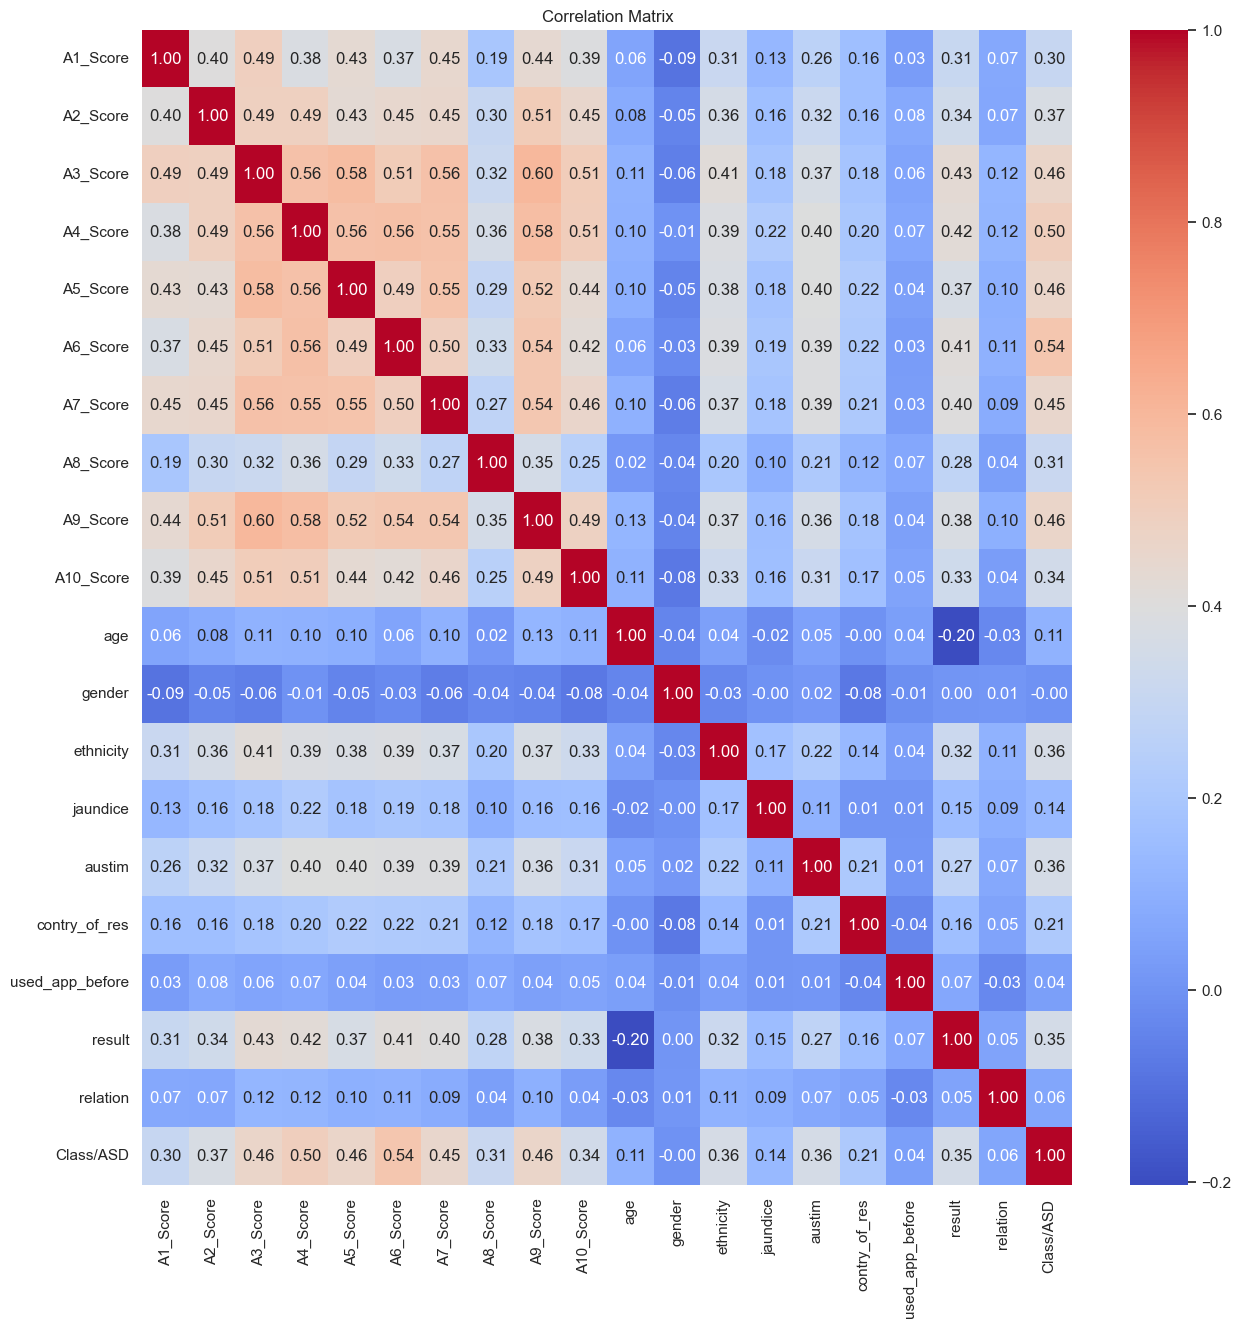

In [167]:
# Correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_autism.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Insihghts from EDA
- There are few outliers in numerical column
- There is class imbalance in target column and categorical feature
- Do not having any high coleration
- Save label encoders

# Data Preprocessing

### Handling outliers -- replace with median

In [169]:
#fuction to  handle  outlier with median
def handle_outliers_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median
    return df



In [170]:
# replace outliers in age and result column with median
df_autism = handle_outliers_median(df_autism, 'age')
df_autism = handle_outliers_median(df_autism, 'result')
df_autism.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,4,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,4,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,4,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,4,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,4,0


In [171]:
df_autism.shape

(800, 20)

In [172]:
x = df_autism.drop('Class/ASD', axis=1)
y = df_autism['Class/ASD']

print(x.shape)
print(y.shape)

(800, 19)
(800,)


In [173]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [174]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(640, 19) (160, 19)
(640,) (160,)


In [175]:
y_train.value_counts()

Class/ASD
0    511
1    129
Name: count, dtype: int64

In [176]:
y_test.value_counts()

Class/ASD
0    128
1     32
Name: count, dtype: int64

### Smote (Synthetic Minority  Oversampling Technique)

In [177]:
smote = SMOTE(random_state=42)

In [178]:
X_train, y_train = smote.fit_resample(X_train, y_train)


In [179]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1022, 19) (160, 19)
(1022,) (160,)


In [182]:
print (y_train.value_counts())

Class/ASD
0    511
1    511
Name: count, dtype: int64


# Model Training

In [183]:
# List of models to train
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

In [185]:
# dictionary to store cross-validation scores
cv_scores = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
    cv_scores[model_name] = cv_score
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Cross-Validation Score: {cv_score:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

Model: Decision Tree
Accuracy: 0.7750
Cross-Validation Score: 0.8689
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       128
           1       0.46      0.69      0.55        32

    accuracy                           0.78       160
   macro avg       0.68      0.74      0.70       160
weighted avg       0.82      0.78      0.79       160

Confusion Matrix:
[[102  26]
 [ 10  22]]
--------------------------------------------------
Model: Random Forest
Accuracy: 0.8313
Cross-Validation Score: 0.9149
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       128
           1       0.56      0.75      0.64        32

    accuracy                           0.83       160
   macro avg       0.74      0.80      0.76       160
weighted avg       0.86      0.83      0.84       160

Confusion Matrix:
[[109  19]
 [  8  24]]
-----------------------------

In [187]:
# Save the best model (Random Forest in this case) using pickle
best_model = models["Random Forest"]
with open('models/random_forestmodel.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Hyperparameter Tuning

In [188]:
# Initialize the models

decison_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(eval_metric='logloss', random_state=42)

In [189]:
#Hyperparameter grids for RandomizedSearchCV
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_param_grid = {
    'n_estimators': [50,100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}
xgb_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5,7 ,10],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2],
}



In [195]:
# Performing RandomizedSearchCV for each model -Hyperparameter Tuning for each model
# The below steps  can be automated using a loop but for better understanding I am doing it manually for each model

# Decision Tree
random_search = RandomizedSearchCV(decison_tree, dt_param_grid, cv=5, n_iter=20, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)
best_dt_model = random_search.best_estimator_

# Random Forest
random_search = RandomizedSearchCV(random_forest, rf_param_grid, cv=5, n_iter=20, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)
best_rf_model = random_search.best_estimator_

# XGBoost
random_search = RandomizedSearchCV(xgboost, xgb_param_grid, cv=5, n_iter=20, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)
best_xgb_model = random_search.best_estimator_

In [196]:
print("Best Decision Tree Model:", best_dt_model)
print("Best Random Forest Model:", best_rf_model)
print("Best XGBoost Model:", best_xgb_model)

Best Decision Tree Model: DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=42)
Best Random Forest Model: RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       n_estimators=200, random_state=42)
Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs

In [197]:
# get the best model with best score

best_model = None
best_score = 0
if random_search.best_score_ > best_score:
    best_score = random_search.best_score_
    best_model = random_search.best_estimator_

print("Best Model:", best_model)
print("Best Score:", best_score)


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)
Best Score: 0.9090435198469633


In [199]:
# Save the best model using pickle after hyperparameter tuning
with open('models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


In [202]:
#evaluate the best model on test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print('classification_report:\n', classification_report(y_test, y_pred))


Accuracy: 0.825
confusion_matrix:
 [[109  19]
 [  9  23]]
classification_report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89       128
           1       0.55      0.72      0.62        32

    accuracy                           0.82       160
   macro avg       0.74      0.79      0.75       160
weighted avg       0.85      0.82      0.83       160



In [208]:
# Built a predictive system using the best model and label_encoders.pkl
def predict_autism(input_data):
    # Drop columns not used in training
    input_data = input_data.drop(columns=['ID', 'age_desc'], errors='ignore')
    # Replace '?' with np.nan and fill missing values as in training
    input_data = input_data.replace('?', np.nan)
    if 'ethnicity' in input_data.columns:
        input_data['ethnicity'] = input_data['ethnicity'].fillna('Others')
    if 'relation' in input_data.columns:
        input_data['relation'] = input_data['relation'].fillna('Others')
    # Convert age to int if needed
    if not pd.api.types.is_integer_dtype(input_data['age']):
        input_data['age'] = input_data['age'].astype(int)
    # Apply label encoding to categorical columns
    for col in label_encoders:
        if col in input_data.columns:
            le = label_encoders[col]
            # If encoder classes are numeric, transform by mapping string forms to indices
            try:
                import numpy as _np
                if _np.issubdtype(le.classes_.dtype, _np.number):
                    mapping = {str(c): i for i, c in enumerate(le.classes_)}
                    input_data[col] = input_data[col].astype(str).map(mapping).fillna(-1).astype(int)
                else:
                    input_data[col] = le.transform(input_data[col].astype(str))
            except Exception as e:
                # fallback to transform and let errors surface if any
                input_data[col] = le.transform(input_data[col].astype(str))
    # Ensure columns order matches training data
    input_data = input_data[x.columns]
    return best_model.predict(input_data)

# Try it with some random data data\test.csv
input_data = pd.read_csv(r"data\test.csv")
print(input_data.head())
print('Predictions: ', predict_autism(input_data))



   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         1         0         0         1         1         0   
1   2         1         0         0         0         0         0         0   
2   3         1         1         1         0         1         1         0   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         1         0         0         0   

   A8_Score  A9_Score  A10_Score        age gender       ethnicity jaundice  \
0         0         1          1  15.599481      m  White-European      yes   
1         1         0          0  27.181099      m           Asian       no   
2         1         1          1  31.643906      m  White-European      yes   
3         0         0          0  25.369210      m               ?       no   
4         0         0          0   9.078580      m               ?       no   

  austim contry_of_res used_app_before     result 